## Figure 4 2 The comparison of Total Annualised Cost per Household (TACH) (Int$ 2020) between the CACTUS database and Narok town as of September 2022. The box plots present the range of TACH for each component except Narok town. Star icons are the cost of Narok town for each component. The components on the left side are for the faecal sludge management system, and on the other side are for sewage systems.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap
import matplotlib.patches as mpatches
from matplotlib.path import Path

In [40]:
# variables
path_excel = r'data.xlsx'
sheetname = 'component_compare'
dpi = 700
file_path = r'fig4-2_component_compare.png'

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 14

title = 'The comparison for each component between Narok town and the CACTUS database', 
xlabel = 'Component', 
ylabel = 'Total Annualised Cost per Household\n(TACH) Int$2020'

<function matplotlib.pyplot.show(close=None, block=None)>

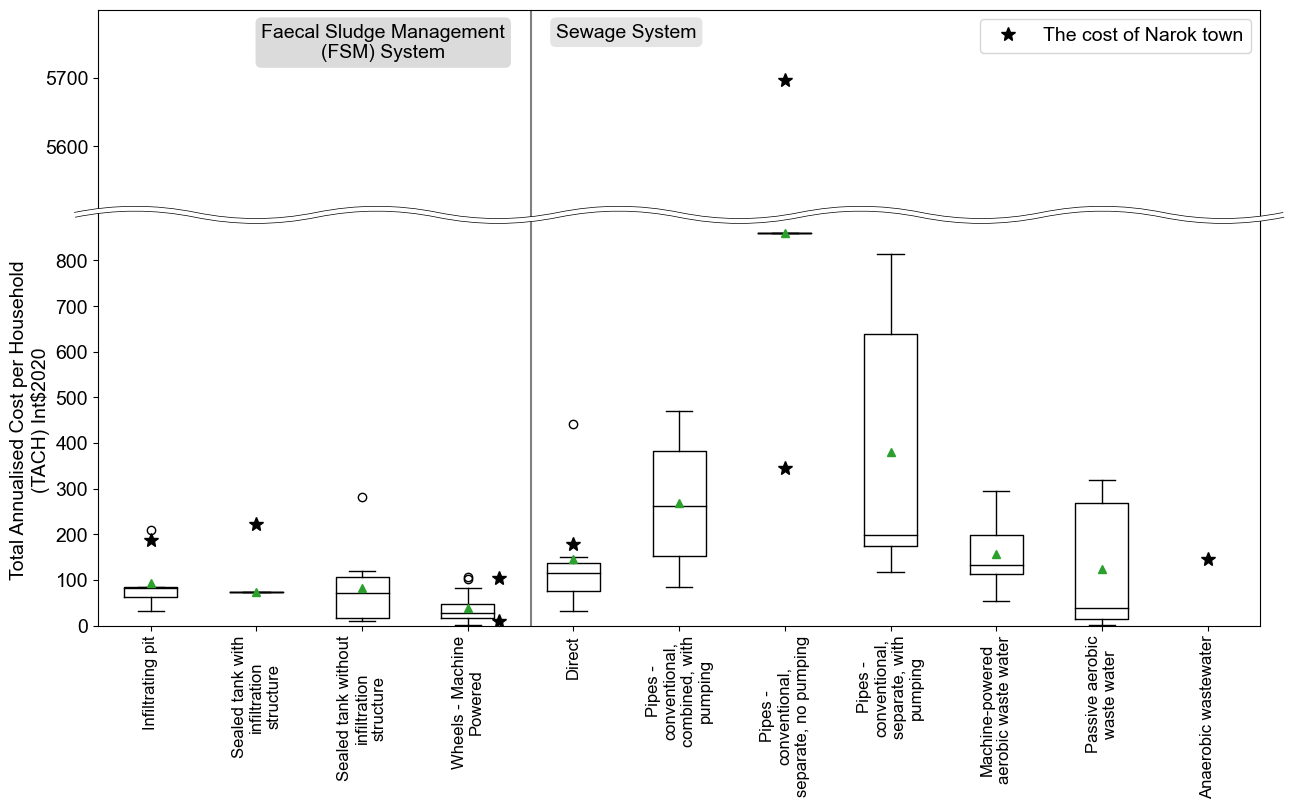

In [87]:
fig, axs = plt.subplots(nrows=2, figsize=(15, 8), sharex='col',
                       gridspec_kw={'height_ratios': (1,2)} )

fig.patch.set_facecolor('white') # 背景色を「白」に設定

df = pd.read_excel(path_excel, sheet_name=sheetname)

groups = df.groupby('component', sort=False)
group_labels = list(groups.groups.keys())

for index, ax in enumerate(axs):

    data = [group[1]['tach'] for group in groups]

    bp = ax.boxplot(data, showmeans=True)
    
    # make median line black
    for median in bp['medians']:
        median.set_color('black')
    
    narok_data_x = [1, 2, 4.3, 4.3, 5, 7, 7, 11]
    narok_data_y = [
        188, # infiltrating pit
        223, # Sealed tank with infiltration structure
        11, 104, # Wheels - Machine Powered
        179, # Direct
        346, 5697, # Pipes - conventional, separate, no pumping
        146 # Anaerobic wastewater
    ]
    
    ax.plot(narok_data_x, narok_data_y, '*', label="The cost of Narok town", markersize=10, color='k')
    
    # add vertial line to separate FSM and Sewage
    for i in range(len(df)-1):
        if i == 4:
            ax.axvline(i + 0.6, color='grey', linestyle='-', alpha=1)
        
fig.subplots_adjust(hspace=0.0)  

# 下段サブプロット
axs[1].set_ylim(0,900)
axs[1].set_yticks(np.arange(0,900,100))
xtick_labels = [ '\n'.join(textwrap.wrap(label, 20)) for label in group_labels ]
axs[1].set_xticks(np.arange(len(xtick_labels)) + 1)
axs[1].set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=12)

# 上段サブプロット
axs[0].set_ylim(5500,5800) 
axs[0].set_yticks(np.arange(5600,5800,100))

# 下段のプロット領域上辺を非表示
axs[1].spines['top'].set_visible(False)

# 上段のプロット領域底辺を非表示、X軸の目盛とラベルを非表示
axs[0].spines['bottom'].set_visible(False)
axs[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 

axs[0].legend(loc="upper right")


## ニョロ線の描画
d1 = 0.02 # X軸のはみだし量
d2 = 0.03 # ニョロ波の高さ
wn = 21   # ニョロ波の数（奇数値を指定）

pp = (0,d2,0,-d2)
px = np.linspace(-d1,1+d1,wn)
py = np.array([1+pp[i%4] for i in range(0,wn)])
p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))

line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                          facecolor='None', clip_on=False,
                          transform=axs[1].transAxes, zorder=10)

line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                           facecolor='None', clip_on=False,
                           transform=axs[1].transAxes, zorder=10,
                           capstyle='round')

a = axs[1].add_patch(line1)
a = axs[1].add_patch(line2)

# axs[0].set_title(title, loc='center', x=0.5, y=1.03, fontsize=14)
axs[1].set_ylabel(ylabel, fontsize=14)

axs[0].text(3.2, 5780, 'Faecal Sludge Management\n(FSM) System', fontsize=14, ha='center', va='top', bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.8, boxstyle='round'))
axs[0].text(5.5, 5780, 'Sewage System', fontsize=14, ha='center', va='top', bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.6, boxstyle='round'))

plt.savefig(file_path, format="png", dpi=dpi, transparent=True, bbox_inches='tight')
plt.show